# House Prices - Advanced Regression Techniques
<img src= "images/houses.png" width = 100%>

## This notebook uses the most known machine learning algorithms to predict the price of the houses based in 80 features. 
### SCORE: 0.13059

<a id="0.0"></a> <br>
## Table of Contents  
1. [Get the data](#1.0)
    1. [Reading the data](#1.1)
    2. [Taking a quick look at the data structure](#1.2)
2. [Visualizing the data to gain insights](#2.0) 
    1. [Taking a quick look at the variable we are going to predict](#2.1)
    2. [Looking for correlations](#2.2)
3. [Preparing the data for machine learning algorithm](#3.0)
    1. [Dealing with missing data](#3.1)
        1. [Categorical feature](#3.1.1)
        2. [Numeric feature](#3.1.2)
    2. [Applying some transformations](#3.2)
    3. [Handling categorical attributes](#3.3)
    4. [Normalization](#3.4)
4. [Selecting and training a model](#4.0)
    1. [Training and evaluating on the training Set](#4.1)
        1. [Linear regression](#4.1.1)
        2. [BayesianRidge](#4.1.2)
        3. [HuberRegressor](#4.1.3)
        4. [Ridge](#4.1.4)
        5. [OrthogonalMatchingPursuit](#4.1.5)
        6. [GradientBoostingRegressor](#4.1.6)
        7. [Xgboost](#4.1.7)
    2. [Better evaluation using cross-validation](#4.2)
        1. [Linear regression](#4.2.1)
        2. [BayesianRidge](#4.2.2)
        3. [HuberRegressor](#4.2.3)
        4. [Ridge](#4.2.4)
        5. [OrthogonalMatchingPursuit](#4.2.5)
        6. [GradientBoostingRegressor](#4.2.6)
        7. [Xgboost](#4.2.7)
5. [Fine-Tune the Model](#5.0)
    1. [Grid search](#5.1)
    2. [Evaluating our model on the test set](#5.2)

<a id="1.0"></a>
# 1. Get the data
[back to the top](#0.0)

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")

# Setting the tables display parameters to show 500 rows and 500 columns.
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

<a id="1.1"></a>
## 1.1 Reading the data
[back to the top](#0.0)

First we are going to read the train and test sets from the kaggle_datasets folder:

In [2]:
df_train = pd.read_csv("kaggle_datasets/train.csv")
df_test = pd.read_csv("kaggle_datasets/test.csv")
sample_submission = pd.read_csv("kaggle_datasets/sample_submission.csv")

Now let's separate the SalePrice variable from the rest of the train set and join the train and test sets to have more data.

In [3]:
df_train_labels = df_train["SalePrice"]
Data = pd.concat([df_train.drop("SalePrice", axis = 1), df_test], axis = 0).reset_index(drop=True)

<a id="1.2"></a>
## 1.2 Taking a quick look at the data structure
[back to the top](#0.0)

In [4]:
Data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

Based on the informations extracted using the info method, It is possible to realize that there are many missing values. Let's take carry of this later! For now, let's keep in mind that there are 11 + 26 numerical variables and 43 categorical variables.

<a id="2.0"></a>
# 2. Visualizing the data to gain insights
[back to the top](#0.0)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

<a id="2.2"></a>
## 2.1 Taking a quick look at the variable we are going to predict
[back to the top](#0.0)

The variable we're trying to predict is the "SalePrice". Let's take a look at the main statistic metrics and the histogram.

In [7]:
df_train_labels.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

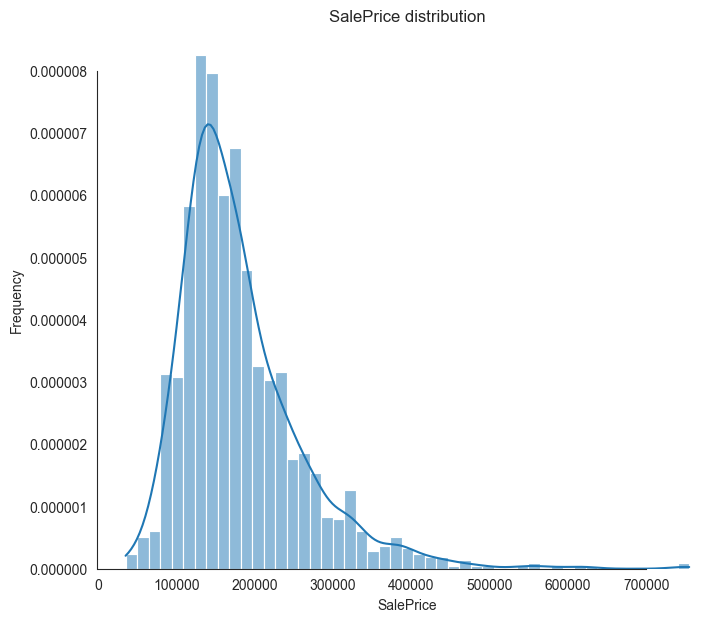

In [8]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
plt.ticklabel_format(style='plain', axis='y')
sns.histplot(df_train_labels, kde = True, stat = 'density')
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True)

**Let's see the skewness and kurtosis of the "SalePrice":**

**Skewness is a measure of asymmetry of a distribution**
    
    When the value of the skewness is negative, the tail of the distribution is longer towards the left hand side of the curve.
    
    When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve

    1. If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
    2. If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
    3. If the skewness is less than -1 or greater than 1, the data are highly skewed
    
**Kurtosis is one of the two measures that quantify shape of a distribution. kutosis determine the volume of the outlier**

    1. If the distribution is tall and thin it is called a leptokurtic distribution(Kurtosis > 3). Values in a leptokurtic distribution are near the mean or at the extremes.
    2. A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called platykurtic(Kurtosis <3) distribution.
    3. A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic(Kurtosis=3) distribution. A mesokurtic distribution looks more close to a normal distribution.

In [9]:
# Skewness and kurtosis
print("Skewness: %f -> highly right skewed" % df_train_labels.skew())
print("Kurtosis: %f -> leptokurtic distribution" % df_train_labels.kurt())

Skewness: 1.882876 -> highly right skewed
Kurtosis: 6.536282 -> leptokurtic distribution


<a id="2.2"></a>
## 2.2 Looking for correlations
[back to the top](#0.0)

**Pearson correlation**

<AxesSubplot: >

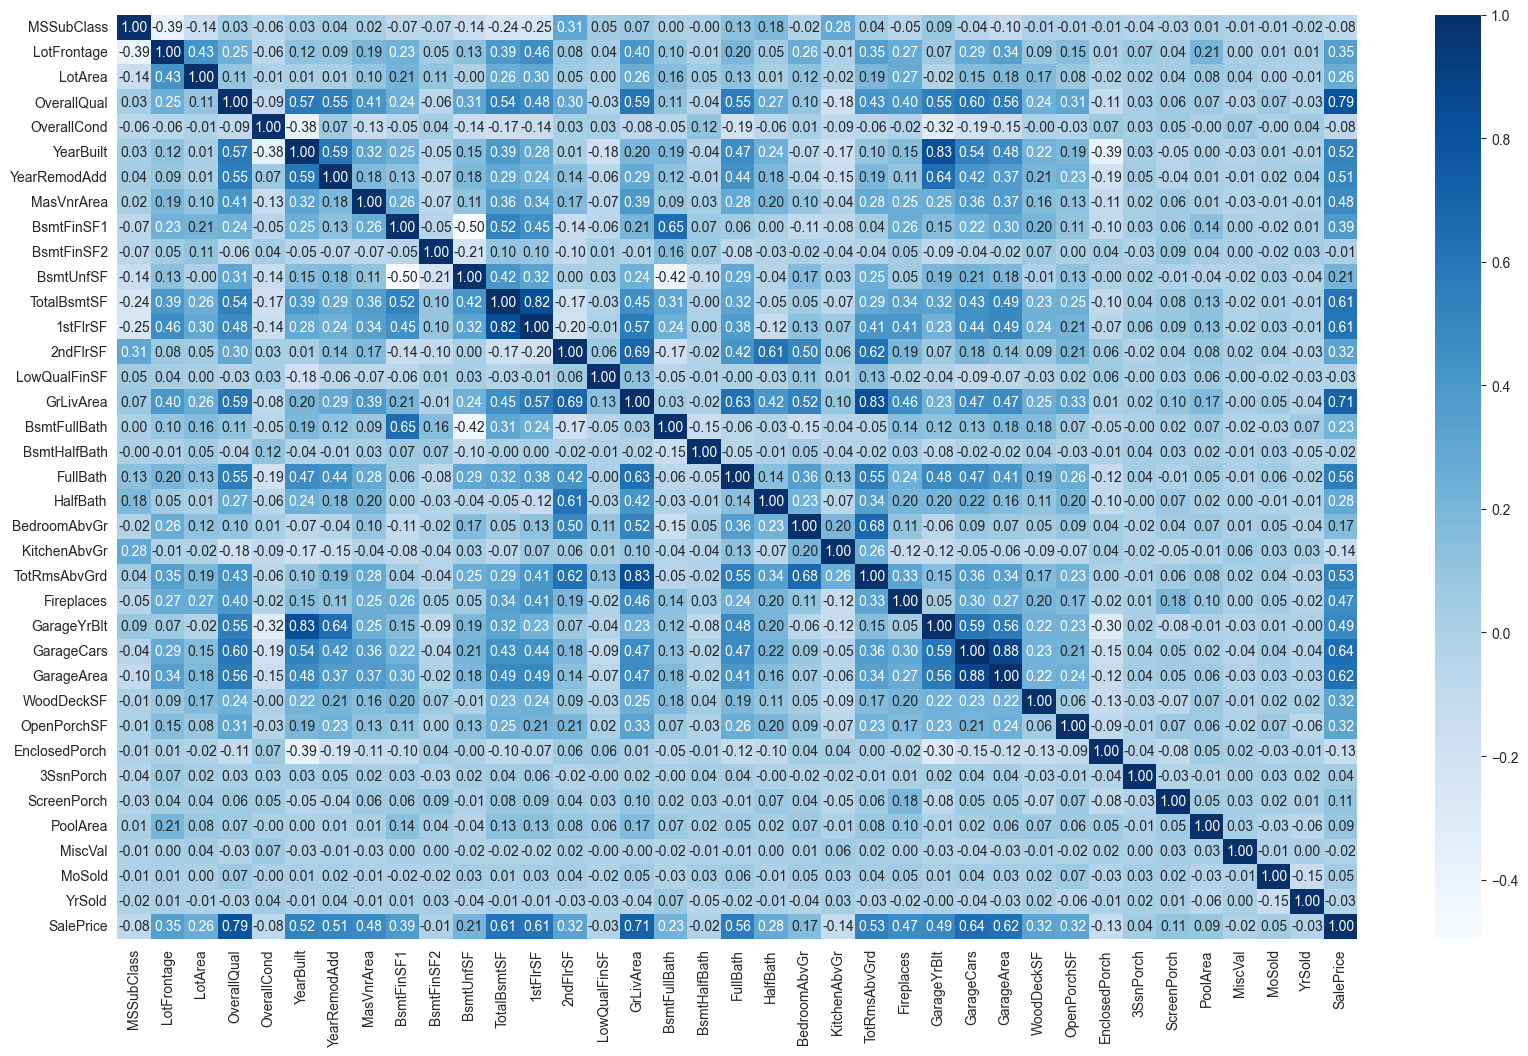

In [10]:
df_train_corr = df_train.drop(columns='Id').corr(method='pearson')
plt.subplots(figsize=(20,12))
sns.heatmap(df_train_corr, cmap=plt.get_cmap("Blues"), annot = True, fmt='.2f')

<AxesSubplot: >

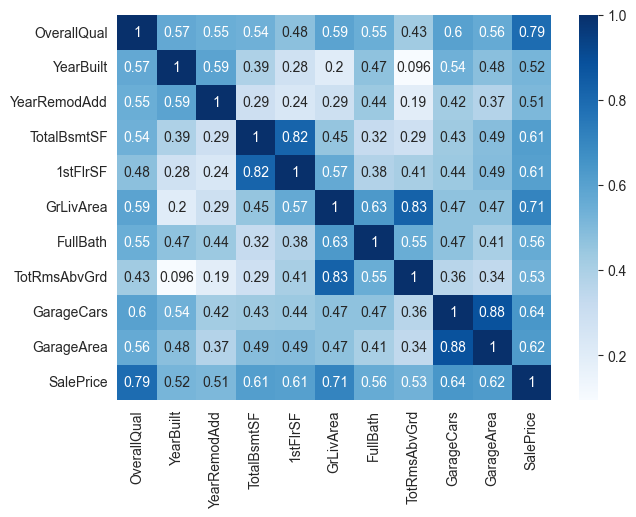

In [11]:
# Features that are strongly related to SalePrice (Pearson correlation > 0.5)
Most_10_corr_SalePrice = df_train_corr.loc[df_train_corr['SalePrice'] > 0.5, df_train_corr['SalePrice'] > 0.5]
plt.subplots(figsize=(7,5))
sns.heatmap(Most_10_corr_SalePrice, cmap="Blues", annot = True)

In [12]:
# Sorting the most correlated features to SalePrice
Sorted_corr = df_train_corr.loc[df_train_corr['SalePrice'] > 0.5, ["SalePrice"]].sort_values(by='SalePrice', ascending=False).drop("SalePrice", axis = 0)
Sorted_corr

,SalePrice
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101


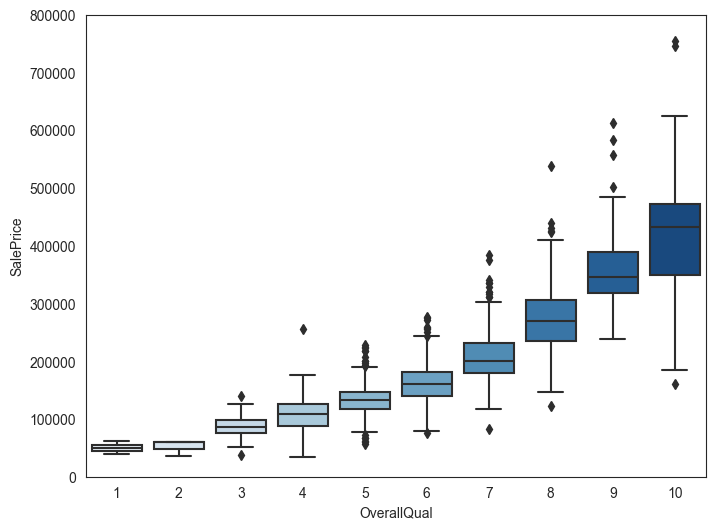

In [13]:
# Overall Quality
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(data=df_train, x = "OverallQual", y = "SalePrice", palette = "Blues")
fig.axis(ymin=0, ymax=800000);

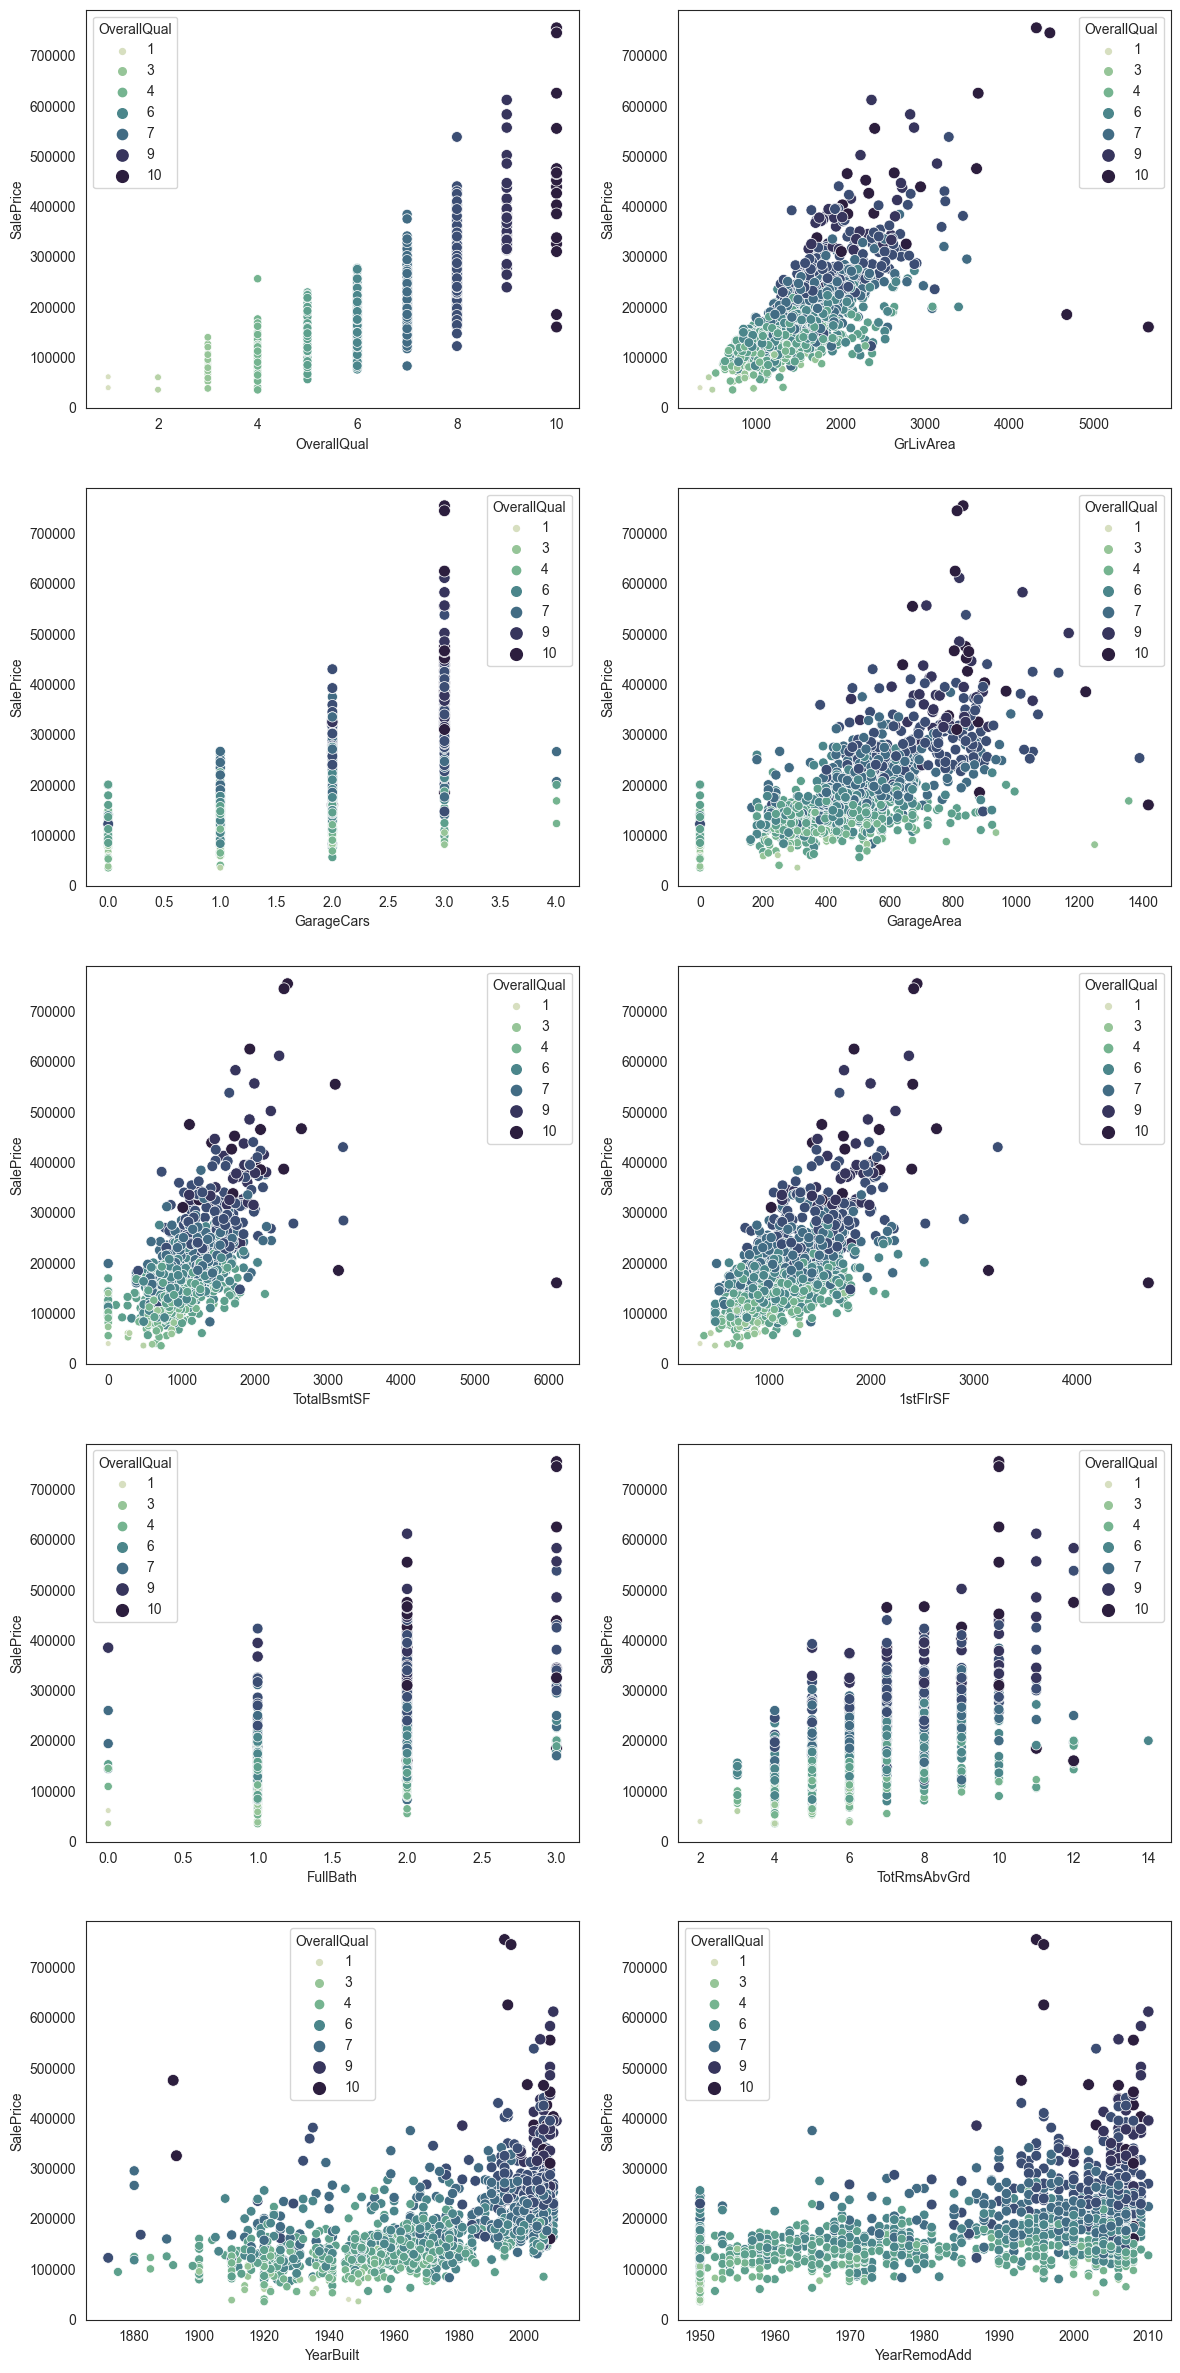

In [14]:
fig, axes = plt.subplots(5, 2, figsize=(14, 30))
palette = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
grid = {0: (0, 0), 1: (0, 1),
        2: (1, 0), 3: (1, 1),
        4: (2, 0), 5: (2, 1),
        6: (3, 0), 7: (3, 1),
        8: (4, 0), 9: (4, 1)}
for i, feature in enumerate(Sorted_corr.index):
    sns.scatterplot(data = df_train, ax = axes[grid[i]], x = feature, y = "SalePrice", hue = "OverallQual", size = "OverallQual", palette = palette)

<a id="3.0"></a>
# 3. Preparing the data for machine learning algorithm
[back to the top](#0.0)

<a id="3.1"></a>
## 3.1 Dealing with missing data
[back to the top](#0.0)

To deal with missing data, let's first create a function that returns the amount of zeros, np.nan and none values.

In [15]:
def miss_data(data):
    Miss_df = (data == 0).sum().to_frame()
    Miss_df = Miss_df.rename(columns = {0: 'zeros'})
    Miss_df.index.name = 'Feature'
    Miss_df['np.nan'] = data.isnull().sum()
    Miss_df['None'] = (data == "None").sum()
    Miss_df['total'] = Miss_df['zeros'] + Miss_df['np.nan'] + Miss_df['None']
    Miss_df['Percent'] = 100*Miss_df['total']/len(data)
    Miss_df['Type'] = [data[i].dtype for i in Miss_df.index ]
    return Miss_df.sort_values(ascending = False, by = 'Percent')

Now, let's plot this values in table format side by side.

In [16]:
# Visualizing the zeros, np.nan and None values of the train and test datasets side by side
miss_data(data = Data)

,zeros,np.nan,None,total,Percent,Type
Feature,,,,,,
PoolQC,0,2909,0,2909,99.657417,object
PoolArea,2906,0,0,2906,99.554642,int64
3SsnPorch,2882,0,0,2882,98.732443,int64
LowQualFinSF,2879,0,0,2879,98.629668,int64
MiscVal,2816,0,0,2816,96.471394,int64
MiscFeature,0,2814,0,2814,96.402878,object
BsmtHalfBath,2742,2,0,2744,94.004796,float64
Alley,0,2721,0,2721,93.216855,object
ScreenPorch,2663,0,0,2663,91.229873,int64


**Let's take a look at each feature and see what kind of imputation we are going to do.**

<a id="3.1.1"></a>
### 3.1.1 Categorical feature
[back to the top](#0.0)

By looking at each categorical feature carefully we can conclude that the missing values in **'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence' and 'MiscFeature'** must be replaced by NA value. In the other hand, **'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Electrical', 'KitchenQual', 'Functional' and 'SaleType'** must be replaced by the most frequent value.

In [17]:
Data_cleaned = Data.drop(columns=["Id"], axis = 1).copy()

# 'MSSubClass' must be a string value
Data_cleaned['MSSubClass'] = Data_cleaned['MSSubClass'].apply(str)

In [18]:
features_to_NA = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
                  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

features_to_Most_freq = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Electrical', 
                         'KitchenQual', 'Functional', 'SaleType']

for col in features_to_NA:
    Data_cleaned[col] = Data_cleaned[col].fillna("NA")
for col in features_to_Most_freq:
    Data_cleaned[col] = Data_cleaned[col].fillna(Data_cleaned[col].mode()[0])

<a id="3.1.2"></a>
### 3.1.2 Numeric feature
[back to the top](#0.0)

In the case of the numeric features we can apply KNeighborsRegressor to predict the missing values based on the non missing values.

In [19]:
from sklearn.neighbors import KNeighborsRegressor

In [20]:
def knn_impute(data, missing_column):
    data = data.copy()
    
    data_num = data.select_dtypes(np.number)
    non_missing_columns = data_num.loc[:, data_num.isna().sum() == 0].columns
    
    X_train = data_num.loc[data_num[missing_column].isna() == False, non_missing_columns]
    y_train = data_num.loc[data_num[missing_column].isna() == False, missing_column]
    
    X_test = data_num.loc[data_num[missing_column].isna() == True, non_missing_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    data.loc[data[missing_column].isna() == True, missing_column] = y_pred
    
    return data

In [21]:
features_to_KNN = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                   'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']

for col in features_to_KNN:
    Data_cleaned = knn_impute(Data_cleaned, col)

**Missing data table**

Plotting the table again, we can see that there are no more missing values.

In [22]:
# Visualizing the zeros, np.nan and None values of the train and test datasets side by side
miss_data(data = Data_cleaned)

,zeros,np.nan,None,total,Percent,Type
Feature,,,,,,
PoolArea,2906,0,0,2906,99.554642,int64
3SsnPorch,2882,0,0,2882,98.732443,int64
LowQualFinSF,2879,0,0,2879,98.629668,int64
MiscVal,2816,0,0,2816,96.471394,int64
BsmtHalfBath,2744,0,0,2744,94.004796,float64
ScreenPorch,2663,0,0,2663,91.229873,int64
BsmtFinSF2,2571,0,0,2571,88.078109,float64
EnclosedPorch,2460,0,0,2460,84.275437,int64
HalfBath,1834,0,0,1834,62.829736,int64


In [23]:
# Fixing Outlier:
# The value 2207 in GarageYrBlt is probably an error. It should be 2007!
Data_cleaned.loc[Data_cleaned.GarageYrBlt==2207,'GarageYrBlt'] = 2007

<a id="3.2"></a>
## 3.2 Applying some transformations
[back to the top](#0.0)

**Log transformation in numeric variables**

First, we create a table that shows us the skewness and tells us whether the variable needs a log transformation or not.

In [24]:
import scipy.stats

def skew_tabel(data):
    skew_df = pd.DataFrame(data.select_dtypes(np.number).columns, columns = ["Feature"])
    skew_df["Skew"] = skew_df["Feature"].apply(lambda feature: scipy.stats.skew(data[feature]))
    skew_df["Absolute Skew"] = skew_df["Skew"].apply(abs)
    skew_df["Skewed"] = skew_df["Absolute Skew"].apply(lambda x: True if x >= 0.5 else False)
    return skew_df

In [25]:
Data_skew = skew_tabel(Data_cleaned)
Data_skew

,Feature,Skew,Absolute Skew,Skewed
0,LotFrontage,1.340751,1.340751,True
1,LotArea,12.822431,12.822431,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,0.570312,0.570312,True
4,YearBuilt,-0.599806,0.599806,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,2.603682,2.603682,True
7,BsmtFinSF1,1.425516,1.425516,True
8,BsmtFinSF2,4.146111,4.146111,True
9,BsmtUnfSF,0.919322,0.919322,True


Now we will apply the logarithmic transformation only to the variables that present skewness less than -0.5 and greater than 0.5

In [26]:
Data_cleaned_trsf = Data_cleaned.copy()
column_skewed = Data_skew.query("Skewed == True")["Feature"].values
for col in column_skewed:
    Data_cleaned_trsf[col] = np.log1p(Data_cleaned[col])

In [27]:
Data_skewed = skew_tabel(Data_cleaned_trsf)
Data_skewed

,Feature,Skew,Absolute Skew,Skewed
0,LotFrontage,-0.929468,0.929468,True
1,LotArea,-0.504751,0.504751,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,-0.746183,0.746183,True
4,YearBuilt,-0.626215,0.626215,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,0.511138,0.511138,True
7,BsmtFinSF1,-0.618036,0.618036,True
8,BsmtFinSF2,2.458996,2.458996,True
9,BsmtUnfSF,-2.159204,2.159204,True


**Log transformation in target variable**

Text(0.5, 0, 'Log SalePrice')

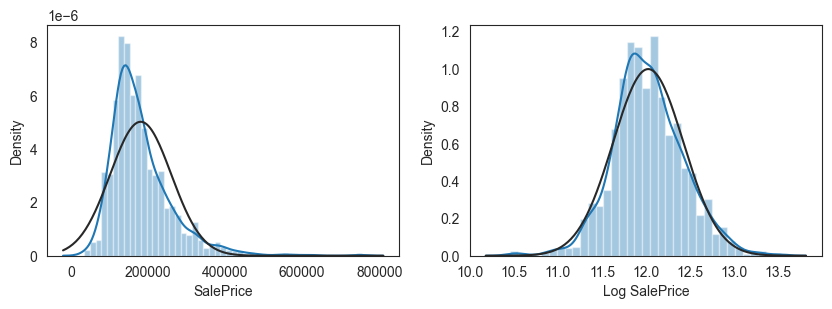

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.distplot(df_train_labels, ax = axes[0], kde = True, fit = scipy.stats.norm)
sns.distplot(np.log(df_train_labels), ax = axes[1], kde = True, fit = scipy.stats.norm)
plt.xlabel("Log SalePrice")

In [29]:
log_train_labels = np.log(df_train_labels)

**Using cosine function to transform cyclic variable**

In [30]:
Data_cleaned_trsf["MoSold"] = -np.cos(0.5236*Data_cleaned_trsf["MoSold"])

<a id="3.3"></a>
## 3.3 Handling categorical attributes
[back to the top](#0.0)

Let's create a table to show the unique values in each categorical variable

In [31]:
#Split columns: categorical / numeric
cols = Data_cleaned_trsf.columns
numeric_columns, categorical_columns = [], []
for i in range(len(cols)):
    if Data_cleaned_trsf[cols[i]].dtypes == 'O':
        categorical_columns.append(cols[i])
    else:
        numeric_columns.append(cols[i])

#Show unique items in categorical variables
categorical_features = pd.DataFrame(categorical_columns, columns = ["Feature"])
unique_values, unique_counts = [], []
for col in categorical_columns:
    unique_values.append(Data_cleaned_trsf[col].unique())
    unique_counts.append(len(Data_cleaned_trsf[col].unique()))

categorical_features["Categories"] = unique_values
categorical_features["Number of values"] = unique_counts
categorical_features

,Feature,Categories,Number of values
0,MSSubClass,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,...",16
1,MSZoning,"[RL, RM, C (all), FV, RH]",5
2,Street,"[Pave, Grvl]",2
3,Alley,"[NA, Grvl, Pave]",3
4,LotShape,"[Reg, IR1, IR2, IR3]",4
5,LandContour,"[Lvl, Bnk, Low, HLS]",4
6,Utilities,"[AllPub, NoSeWa]",2
7,LotConfig,"[Inside, FR2, Corner, CulDSac, FR3]",5
8,LandSlope,"[Gtl, Mod, Sev]",3
9,Neighborhood,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...",25


Now we can use the get_dummies method of pandas to remove the variable and add a new binary variable for each unique integer value (one-hot encoder).

In [32]:
Data_cleaned_CaTr = pd.get_dummies(Data_cleaned_trsf)

<a id="3.4"></a>
## 3.4 Normalization
[back to the top](#0.0)

In [33]:
from sklearn.preprocessing import StandardScaler

Data_cleaned_CaTr_norm = Data_cleaned_CaTr.copy()

In [34]:
std_scaler = StandardScaler()
rescaled_Data = std_scaler.fit_transform(Data_cleaned_CaTr_norm)

In [35]:
Data_cleaned_CaTr_norm = pd.DataFrame(rescaled_Data, columns = Data_cleaned_CaTr_norm.columns)

In [36]:
Data_cleaned_CaTr_norm.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,

<a id="4.0"></a>
# 4. Selecting and training a model
[back to the top](#0.0)

<a id="4.1"></a>
## 4.1 Training and evaluating on the training Set
[back to the top](#0.0)

In [37]:
# Split the train and the test set
df_train_cleaned_CaTr_norm = Data_cleaned_CaTr_norm.loc[:df_train.index.max(), :]
df_test_cleaned_CaTr_norm = Data_cleaned_CaTr_norm.loc[df_train.index.max()+1:, :].reset_index(drop = True)

In [38]:
df_train_cleaned_CaTr_norm

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,

In [39]:
df_test_cleaned_CaTr_norm

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,

<a id="4.1.1"></a>
### 4.1.1 Linear regression
[back to the top](#0.0)

In [40]:
# Import the linear regression model
from sklearn.linear_model import LinearRegression

# Training the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(df_train_cleaned_CaTr_norm, log_train_labels)

LinearRegression()

In [41]:
linear_reg_predictions = linear_reg.predict(df_train_cleaned_CaTr_norm)

In [42]:
from sklearn.metrics import mean_squared_error

linear_reg_mse = mean_squared_error(log_train_labels, linear_reg_predictions)
linear_reg_rmse = np.sqrt(linear_reg_mse)
print("The mean square error for linear regression is:", linear_reg_rmse)

The mean square error for linear regression is: 0.09123251496298362


In [43]:
from sklearn.metrics import mean_squared_log_error

linear_reg_msle = mean_squared_log_error(log_train_labels, linear_reg_predictions)
linear_reg_rmsle = np.sqrt(linear_reg_msle)
print("The mean square log error for linear regression is:", linear_reg_rmsle)

The mean square log error for linear regression is: 0.007080204617972762


In [44]:
from sklearn.metrics import r2_score

linear_reg_r2score = r2_score(linear_reg_predictions, log_train_labels)
print("The r2_score of the linear regression model is {}%".format(round(linear_reg_r2score, 2) *100))

The r2_score of the linear regression model is 95.0%


<a id="4.1.2"></a>
### 4.1.2 BayesianRidge
[back to the top](#0.0)

In [45]:
from sklearn.linear_model import BayesianRidge

Bayesian_Ridge_reg = BayesianRidge()
Bayesian_Ridge_reg.fit(df_train_cleaned_CaTr_norm, log_train_labels)

BayesianRidge()

In [46]:
Bayesian_Ridge_predictions = Bayesian_Ridge_reg.predict(df_train_cleaned_CaTr_norm)

In [47]:
Bayesian_Ridge_reg_mse = mean_squared_error(log_train_labels, Bayesian_Ridge_predictions)
Bayesian_Ridge_reg_rmse = np.sqrt(Bayesian_Ridge_reg_mse)
print("The mean square error for Bayesian Ridge is:", Bayesian_Ridge_reg_rmse)

The mean square error for Bayesian Ridge is: 0.09357400060118296


In [48]:
Bayesian_Ridge_reg_msle = mean_squared_log_error(log_train_labels, Bayesian_Ridge_predictions)
Bayesian_Ridge_reg_rmsle = np.sqrt(Bayesian_Ridge_reg_msle)
print("The mean square log error for Bayesian_Ridge is:", Bayesian_Ridge_reg_rmsle)

The mean square log error for Bayesian_Ridge is: 0.0072562211721986306


In [49]:
Bayesian_Ridge_reg_r2score = r2_score(log_train_labels, Bayesian_Ridge_predictions)
print("The r2_score of the Bayesian_Ridge model is {}%".format(round(Bayesian_Ridge_reg_r2score, 2) *100))

The r2_score of the Bayesian_Ridge model is 95.0%


<a id="4.1.3"></a>
### 4.1.3 HuberRegressor
[back to the top](#0.0)

In [50]:
from sklearn.linear_model import HuberRegressor

Huber_reg = HuberRegressor()
Huber_reg.fit(df_train_cleaned_CaTr_norm, log_train_labels)

HuberRegressor()

In [51]:
Huber_predictions = Huber_reg.predict(df_train_cleaned_CaTr_norm)

In [52]:
Huber_reg_mse = mean_squared_error(log_train_labels, Huber_predictions)
Huber_reg_rmse = np.sqrt(Huber_reg_mse)
print("The mean square error for Huber is:", Huber_reg_rmse)

The mean square error for Huber is: 0.09521437924884533


In [53]:
Huber_reg_msle = mean_squared_log_error(log_train_labels, Huber_predictions)
Huber_reg_rmsle = np.sqrt(Huber_reg_msle)
print("The mean square log error for Huber is:", Huber_reg_rmsle)

The mean square log error for Huber is: 0.007413111541746959


In [54]:
Huber_reg_r2score = r2_score(log_train_labels, Huber_predictions)
print("The r2_score of the Huber model is {}%".format(round(Huber_reg_r2score, 2) *100))

The r2_score of the Huber model is 94.0%


<a id="4.1.4"></a>
### 4.1.4 Ridge
[back to the top](#0.0)

In [55]:
from sklearn.linear_model import Ridge

Ridge_reg = Ridge()
Ridge_reg.fit(df_train_cleaned_CaTr_norm, log_train_labels)

Ridge()

In [56]:
Ridge_predictions = Ridge_reg.predict(df_train_cleaned_CaTr_norm)

In [57]:
Ridge_reg_mse = mean_squared_error(log_train_labels, Ridge_predictions)
Ridge_reg_rmse = np.sqrt(Ridge_reg_mse)
print("The mean square error for Ridge is:", Ridge_reg_rmse)

The mean square error for Ridge is: 0.09104844207029315


In [58]:
Ridge_reg_msle = mean_squared_log_error(log_train_labels, Ridge_predictions)
Ridge_reg_rmsle = np.sqrt(Ridge_reg_msle)
print("The mean square log error for Ridge is:", Ridge_reg_rmsle)

The mean square log error for Ridge is: 0.007064466209491177


In [59]:
Ridge_reg_r2score = r2_score(log_train_labels, Ridge_predictions)
print("The r2_score of the Ridge model is {}%".format(round(Ridge_reg_r2score, 2) *100))

The r2_score of the Ridge model is 95.0%


<a id="4.1.5"></a>
### 4.1.5 OrthogonalMatchingPursuit
[back to the top](#0.0)

In [60]:
from sklearn.linear_model import OrthogonalMatchingPursuit

Orthogonal_Matching_Pursuit = OrthogonalMatchingPursuit()
Orthogonal_Matching_Pursuit.fit(df_train_cleaned_CaTr_norm, log_train_labels)

OrthogonalMatchingPursuit()

In [61]:
Orthogonal_Matching_Pursuit_predictions = Orthogonal_Matching_Pursuit.predict(df_train_cleaned_CaTr_norm)

In [62]:
Orthogonal_Matching_Pursuit_mse = mean_squared_error(log_train_labels, Orthogonal_Matching_Pursuit_predictions)
Orthogonal_Matching_Pursuit_rmse = np.sqrt(Orthogonal_Matching_Pursuit_mse)
print("The mean square error for Orthogonal Matching Pursuit is:", Orthogonal_Matching_Pursuit_rmse)

The mean square error for Orthogonal Matching Pursuit is: 0.10952174446554985


In [63]:
Orthogonal_Matching_Pursuit_msle = mean_squared_log_error(log_train_labels, Orthogonal_Matching_Pursuit_predictions)
Orthogonal_Matching_Pursuit_rmsle = np.sqrt(Orthogonal_Matching_Pursuit_msle)
print("The mean square log error for Orthogonal Matching Pursuit is:", Orthogonal_Matching_Pursuit_rmsle)

The mean square log error for Orthogonal Matching Pursuit is: 0.00850362996775845


In [64]:
Orthogonal_Matching_Pursuit_r2score = r2_score(log_train_labels, Orthogonal_Matching_Pursuit_predictions)
print("The r2_score of the Orthogonal Matching Pursuit model is {}%".format(round(Orthogonal_Matching_Pursuit_r2score, 2) *100))

The r2_score of the Orthogonal Matching Pursuit model is 92.0%


<a id="4.1.6"></a>
### 4.1.6 GradientBoostingRegressor
[back to the top](#0.0)

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

GradientBoosting_reg = GradientBoostingRegressor()
GradientBoosting_reg.fit(df_train_cleaned_CaTr_norm, log_train_labels)

GradientBoostingRegressor()

In [66]:
GradientBoosting_predictions = GradientBoosting_reg.predict(df_train_cleaned_CaTr_norm)

In [67]:
GradientBoosting_reg_mse = mean_squared_error(log_train_labels, GradientBoosting_predictions)
GradientBoosting_reg_rmse = np.sqrt(GradientBoosting_reg_mse)
print("The mean square error for GradientBoosting is:", GradientBoosting_reg_rmse)

The mean square error for GradientBoosting is: 0.0806641199944999


In [68]:
GradientBoosting_reg_msle = mean_squared_log_error(log_train_labels, GradientBoosting_predictions)
GradientBoosting_reg_rmsle = np.sqrt(GradientBoosting_reg_msle)
print("The mean square log error for GradientBoosting is:", GradientBoosting_reg_rmsle)

The mean square log error for GradientBoosting is: 0.006236966504125311


In [69]:
GradientBoosting_reg_r2score = r2_score(log_train_labels, GradientBoosting_predictions)
print("The r2_score of the random GradientBoosting is {}%".format(round(GradientBoosting_reg_r2score, 2) *100))

The r2_score of the random GradientBoosting is 96.0%


<a id="4.1.7"></a>
### 4.1.7 Xgboost
[back to the top](#0.0)

In [70]:
from xgboost import XGBRegressor

xgboost_reg = XGBRegressor()
xgboost_reg.fit(df_train_cleaned_CaTr_norm, log_train_labels)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [71]:
xgboost_predictions = xgboost_reg.predict(df_train_cleaned_CaTr_norm)

In [72]:
xgboost_reg_mse = mean_squared_error(log_train_labels, xgboost_predictions)
xgboost_reg_rmse = np.sqrt(xgboost_reg_mse)
print("The mean square error for xgboost is:", xgboost_reg_rmse)

The mean square error for xgboost is: 0.011202282374316596


In [73]:
xgboost_reg_msle = mean_squared_log_error(log_train_labels, xgboost_predictions)
xgboost_reg_rmsle = np.sqrt(xgboost_reg_msle)
print("The mean square log error for xgboost is:", xgboost_reg_rmsle)

The mean square log error for xgboost is: 0.0008621192267685984


In [74]:
xgboost_reg_r2score = r2_score(log_train_labels, xgboost_predictions)
print("The r2_score of the xgboost model is {}%".format(round(xgboost_reg_r2score, 2) *100))

The r2_score of the xgboost model is 100.0%


<a id="4.2"></a>
# 4.2 Better evaluation using cross-validation
[back to the top](#0.0)

In [75]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

<a id="4.2.1"></a>
### 4.2.1 Linear regression
[back to the top](#0.0)

In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
linear_reg_CrossValScores = cross_val_score(linear_reg, df_train_cleaned_CaTr_norm, log_train_labels,
                         scoring="neg_mean_squared_error", cv=10)
linear_reg_rmse_scores = np.sqrt(-linear_reg_CrossValScores)
display_scores(linear_reg_rmse_scores)

Scores: [3.55297914e+12 1.94625402e+12 1.97829237e+12 1.33589645e+12
 3.38340790e+11 1.22485738e+11 4.17791206e+12 5.69547637e+11
 3.49866717e+12 9.47501552e+11]
Mean: 1846787692666.6577
Standard deviation: 1380247070677.56


<a id="4.2.2"></a>
### 4.2.2 BayesianRidge
[back to the top](#0.0)

In [78]:
Bayesian_Ridge_CrossValScores = cross_val_score(Bayesian_Ridge_reg, df_train_cleaned_CaTr_norm, log_train_labels,
                         scoring="neg_mean_squared_error", cv=10)
Bayesian_Ridge_rmse_scores = np.sqrt(-Bayesian_Ridge_CrossValScores)
display_scores(Bayesian_Ridge_rmse_scores)

Scores: [0.11909368 0.10242527 0.11956046 0.15613564 0.14311965 0.13339426
 0.12079463 0.09825994 0.18123114 0.12815919]
Mean: 0.13021738480199477
Standard deviation: 0.023610869770996516


<a id="4.2.3"></a>
### 4.2.3 HuberRegressor
[back to the top](#0.0)

In [79]:
Huber_CrossValScores = cross_val_score(Huber_reg, df_train_cleaned_CaTr_norm, log_train_labels,
                         scoring="neg_mean_squared_error", cv=10)
Huber_rmse_scores = np.sqrt(-Huber_CrossValScores)
display_scores(Huber_rmse_scores)

Scores: [1.02709671 1.44068504 2.55895259 1.09349266 1.39103254 0.44117358
 2.42894503 1.40635017 2.78306376 2.43457171]
Mean: 1.7005363796900537
Standard deviation: 0.7507336101868755


<a id="4.2.4"></a>
### 4.2.4 Ridge
[back to the top](#0.0)

In [80]:
Ridge_CrossValScores = cross_val_score(Ridge_reg, df_train_cleaned_CaTr_norm, log_train_labels,
                         scoring="neg_mean_squared_error", cv=10)
Ridge_rmse_scores = np.sqrt(-Ridge_CrossValScores)
display_scores(Ridge_rmse_scores)

Scores: [0.12614018 0.10614651 0.12099953 0.1608885  0.14869287 0.15389974
 0.12632646 0.09851781 0.1933663  0.12694414]
Mean: 0.13619220593351888
Standard deviation: 0.026805656460400853


<a id="4.2.5"></a>
### 4.2.5 OrthogonalMatchingPursuit
[back to the top](#0.0)

In [81]:
Orthogonal_Matching_Pursuit_CrossValScores = cross_val_score(Orthogonal_Matching_Pursuit, df_train_cleaned_CaTr_norm, log_train_labels,
                         scoring="neg_mean_squared_error", cv=10)
Orthogonal_Matching_Pursuit_rmse_scores = np.sqrt(-Orthogonal_Matching_Pursuit_CrossValScores)
display_scores(Orthogonal_Matching_Pursuit_rmse_scores)

Scores: [0.11980172 0.09275608 0.11019281 0.16613291 0.14802791 0.15025307
 0.12075681 0.09898054 0.17878063 0.13038953]
Mean: 0.13160720091246364
Standard deviation: 0.027066090882523586


<a id="4.2.6"></a>
### 4.2.6 GradientBoostingRegressor
[back to the top](#0.0)

In [82]:
GradientBoosting_CrossValScores = cross_val_score(GradientBoosting_reg, df_train_cleaned_CaTr_norm, log_train_labels,
                         scoring="neg_mean_squared_error", cv=10)
GradientBoosting_rmse_scores = np.sqrt(-GradientBoosting_CrossValScores)
display_scores(GradientBoosting_rmse_scores)

Scores: [0.12948738 0.10156243 0.1166144  0.16136627 0.15433177 0.10881758
 0.13161988 0.10798113 0.11994884 0.13996219]
Mean: 0.12716918545375214
Standard deviation: 0.019027073862373057


<a id="4.2.7"></a>
### 4.2.7 Xgboost
[back to the top](#0.0)

In [83]:
xgboost_CrossValScores = cross_val_score(xgboost_reg, df_train_cleaned_CaTr_norm, log_train_labels,
                         scoring="neg_mean_squared_error", cv=10)
xgboost_rmse_scores = np.sqrt(-xgboost_CrossValScores)
display_scores(xgboost_rmse_scores)

Scores: [0.13400061 0.11318915 0.12319208 0.17324284 0.16064358 0.113158
 0.15533458 0.12297306 0.13415697 0.1430079 ]
Mean: 0.13728987869904635
Standard deviation: 0.019452156487712553


The xgboost model presents a better reliability in the results.

<a id="5.0"></a>
# 5. Fine-Tune the Model
[back to the top](#0.0)

<a id="5.1"></a>
# 5.1 Grid search
[back to the top](#0.0)

In [84]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators": [1000], "max_depth": [4, 8], "subsample": [0.5, 0.6], "learning_rate": [0.1, 0.3]}

xgboost_reg = XGBRegressor(random_state=42)
grid_search = GridSearchCV(xgboost_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(df_train_cleaned_CaTr_norm, log_train_labels)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.3], 'max_depth': [4, 8],
                         'n_estimators': [1000], 'subsample': [0.5, 0.6]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [85]:
print("The best parameters are", grid_search.best_params_, "resulting in a score of", np.sqrt(-grid_search.best_score_))

The best parameters are {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.5} resulting in a score of 0.12582251811541528


In [86]:
# To print all parameters combinations and the mean of scores

grid_search_results = pd.DataFrame(np.sqrt(-grid_search.cv_results_["mean_test_score"]), columns = ["mean_test_score"])
grid_search_results["params"] = grid_search.cv_results_["params"]
grid_search_results

,mean_test_score,params
0,0.125823,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti..."
1,0.126999,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti..."
2,0.130709,"{'learning_rate': 0.1, 'max_depth': 8, 'n_esti..."
3,0.129910,"{'learning_rate': 0.1, 'max_depth': 8, 'n_esti..."
4,0.146702,"{'learning_rate': 0.3, 'max_depth': 4, 'n_esti..."
5,0.144760,"{'learning_rate': 0.3, 'max_depth': 4, 'n_esti..."
6,0.153322,"{'learning_rate': 0.3, 'max_depth': 8, 'n_esti..."
7,0.151319,"{'learning_rate': 0.3, 'max_depth': 8, 'n_esti..."


<a id="5.2"></a>
# 5.2 Evaluating our model on the test set
[back to the top](#0.0)

In [87]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(df_test_cleaned_CaTr_norm)

In [88]:
submission = pd.concat([df_test.Id, pd.Series(np.exp(final_predictions), name = "SalePrice")], axis = 1)
submission

,Id,SalePrice
0,1461,119041.476562
1,1462,166120.984375
2,1463,193261.156250
3,1464,191517.218750
4,1465,189076.171875
...,...,...
1454,2915,80571.007812
1455,2916,85868.781250
1456,2917,157908.265625
1457,2918,115960.070312


In [89]:
submission.to_csv("./submission.csv", index = False, header = True)